# Below now superseeded by pseudobulking approach ***

### Investigating how conserved each DC population is across cancer types by calculating correlation

In [1]:
#load packages I need
import os
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

In [3]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [4]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')
#data_DC = sc.read_h5ad('NRclean_clustered2_DC.h5ad')

In [5]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

In [12]:
# Make a new metadata column that is DC type and cancer type combined:
data.obs["subset_v_cancer"] = data.obs["NR_annotations_simple"].astype(str) + "_" + data.obs["cancer_broadest"].astype(str)
data.obs["subset_v_cancer"] = data.obs["subset_v_cancer"].astype("category")

In [16]:
# Subset to primary tumours and DC only
data_P = data[data.obs["sample_type_major2"] == "primary tumour"]
data_P_DC = data_P[data_P.obs["NR_annotations_simple"].isin(["cDC1","cDC2","mregDC"])]

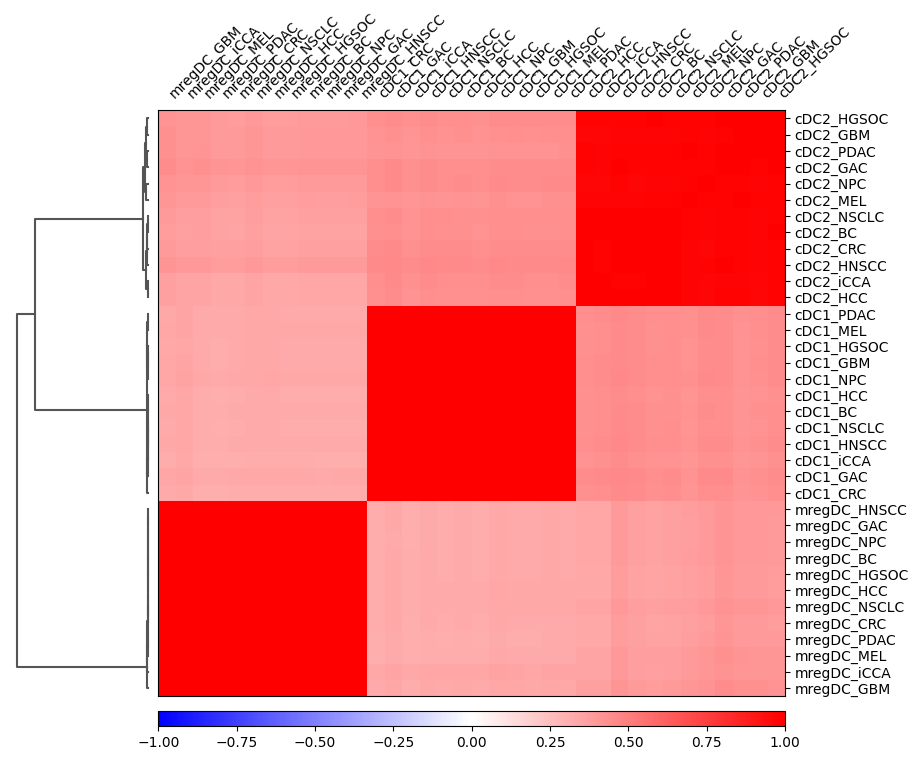

In [22]:
sc.pl.correlation_matrix(data_P_DC, "subset_v_cancer", figsize=(10, 8))

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/tools/_dendrogram.py:193: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = dat


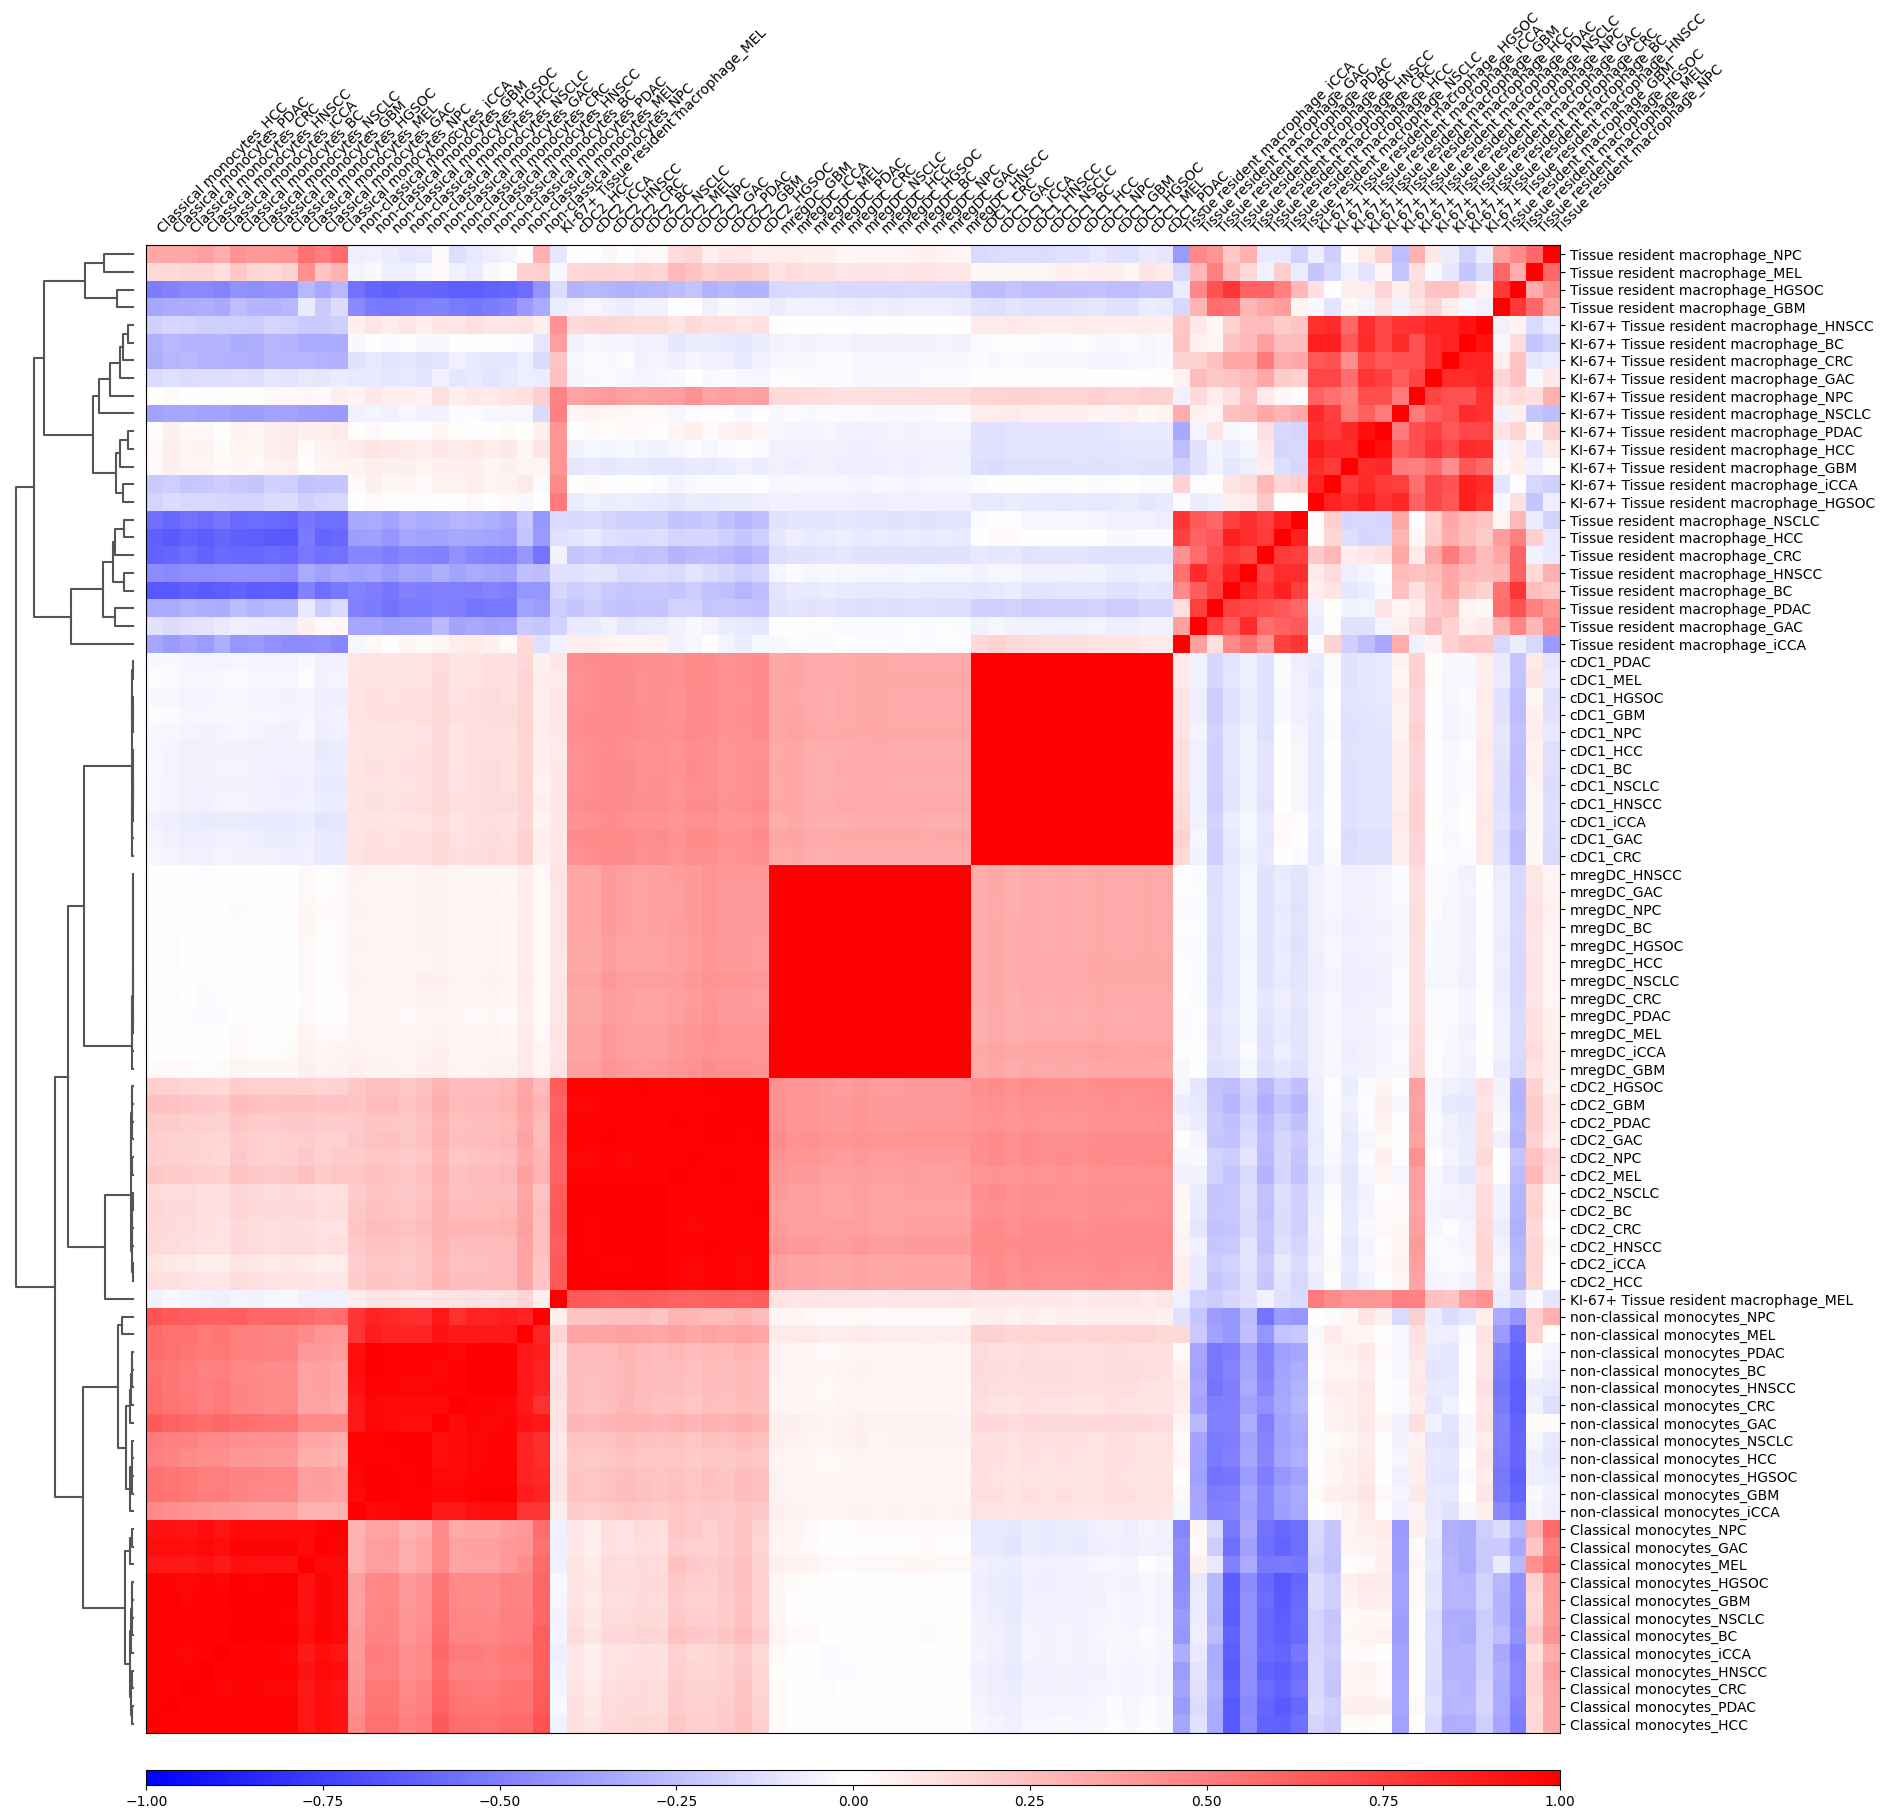

In [19]:
sc.pl.correlation_matrix(data_P, "subset_v_cancer", figsize=(20, 20))